#EXERCISE 8.1 and 8.2

###Evaluation of an Hamiltonian expected value using simulated annealing algorithms

The objective is the evaluation of:

$$
\langle {\hat H} \rangle_T =
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} =
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

for a trial wavefunction:

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}$$

with:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Therefore, in order to compute $⟨\hat H⟩$, anlaytical derivation of the wavefunction must be calculated:


$$
\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{{\big(-\frac{\hbar^2}{2 m} \frac{\partial^2}{\partial x^2}} + V(x)\big) \Psi_T(x)}{\Psi_T(x)}
$$

obtaining, for the second derivative:

$$
-\frac{\hbar^2}{2 m} \frac{\partial^2}{\partial x^2} = \frac{1}{σ^2}[(\frac{x - μ}{σ^2} - 1)e^{-\frac{x - μ}{2σ^2}} + (\frac{x + μ}{σ^2} - 1)e^{-\frac{x + μ}{2σ^2}}]
$$

The best value (minimum) of $⟨\hat H⟩$ can be found for the parameters $σ$ and $μ$ by exploring the space (σ, μ) accepting or rejecting every step with a probability dependent on "Temperature" $P = e^{\frac{⟨\hat H⟩|_{σ, μ} - ⟨\hat H⟩|_{σ', μ'}}{T}}$, i.e. with a simulated annealing algorithm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_tot = pd.read_csv("output_dump_SA.dat", delim_whitespace=True)

#filter only for accepted steps
df_accepted = df_tot[df_tot['acceptance'] == 1]

df_accepted

,T,sigma,mu,H_value,error,acceptance
0,1.00,2.00000,3.00000,38.235900,4.712770,1
2,1.00,1.95329,3.00033,38.235900,4.077410,1
7,1.00,1.90557,2.96396,14.804400,2.158080,1
13,1.00,1.93760,2.95936,12.131900,0.451485,1
17,1.00,1.93025,3.00657,1.361870,0.122727,1
...,...,...,...,...,...,...
9317,0.07,2.74227,2.39845,-0.567603,0.091018,1
9347,0.07,2.73812,2.39405,-0.621587,0.084889,1
9375,0.07,2.71696,2.37349,-0.568358,0.123460,1
9405,0.06,2.75984,2.33620,-0.682374,0.052920,1


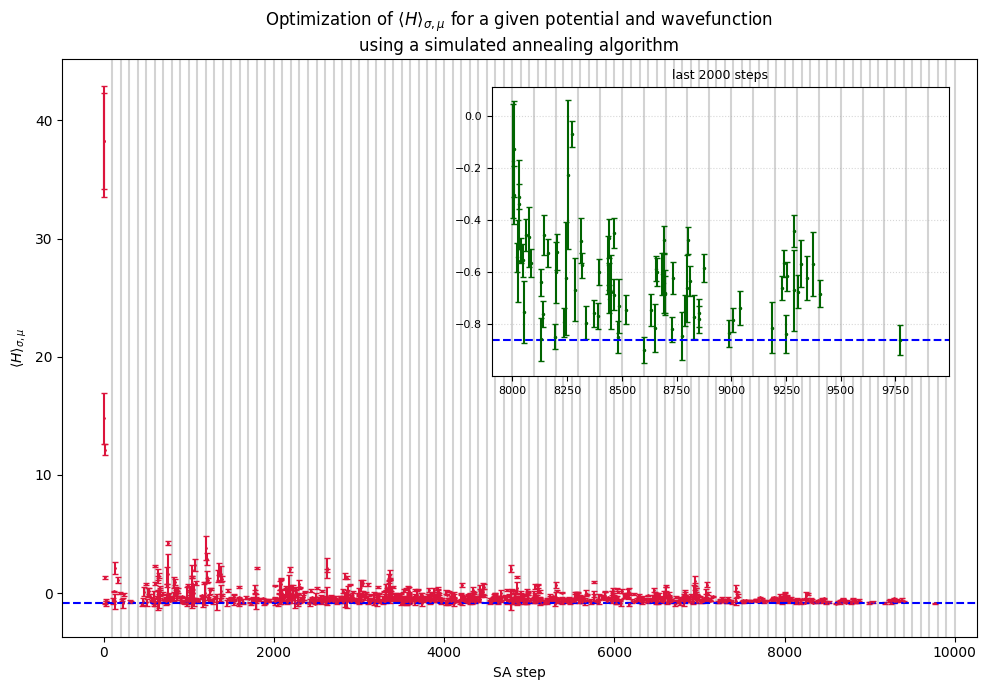

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#plot H estimation:
fig, ax = plt.subplots(1,1,figsize=(10, 7))
ax.errorbar(x=df_accepted.index, y=df_accepted['H_value'], yerr=df_accepted['error'], fmt='o', markersize = 1, capsize=2, color='crimson')

ax.set(xlabel='SA step', ylabel = r'$\langle H \rangle _{\sigma, \mu}$',
       title = r'Optimization of $\langle H \rangle _{\sigma, \mu}$ for a given potential and wavefunction'+'\n'+'using a simulated annealing algorithm')

for i in np.arange(100, len(df_tot), 100): ax.axvline(i, color = 'lightgrey', zorder = 0)
ax.axhline(list(df_accepted['H_value'])[-1], linestyle = '--', color='blue')


inset_ax = inset_axes(ax, width="50%", height="50%", loc='upper right', borderpad=2)

zoom_data = df_accepted.loc[8000:]

inset_ax.errorbar(x=zoom_data.index, y=zoom_data['H_value'], yerr=zoom_data['error'],
                  fmt='o', markersize=1.5, capsize=2, color='darkgreen')

inset_ax.set_title("last 2000 steps", fontsize=9)
for i in np.arange(8000, 10000, 100): inset_ax.axvline(i, color = 'lightgrey', zorder = 0)
inset_ax.axhline(list(df_accepted['H_value'])[-1], linestyle = '--', color='blue')
inset_ax.tick_params(axis='both', labelsize=8)

inset_ax.yaxis.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()
plt.close()

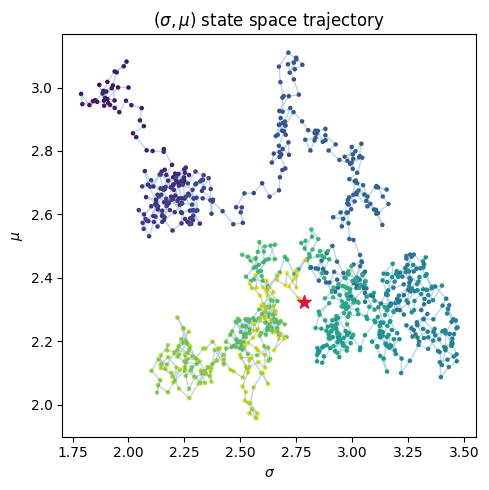

In [ ]:

#plot trajectory:
fig, ax = plt.subplots(1,1,figsize=(5, 5))

colors = np.linspace(0, 1, len(df_accepted))

ax.plot(df_accepted['sigma'], df_accepted['mu'], linewidth = 1, alpha = 0.3)
ax.scatter(df_accepted['sigma'], df_accepted['mu'], s = 5, c = colors)
ax.scatter(df_accepted['sigma'].iloc[-1], df_accepted['mu'].iloc[-1], s = 100, marker='*', c = 'crimson', zorder = 100)

ax.set(xlabel=r'$\sigma$', ylabel = r'$\mu$',
       title = r'$(\sigma, \mu)$ state space trajectory')


plt.tight_layout()
plt.show()
plt.close()

<ErrorbarContainer object of 3 artists>

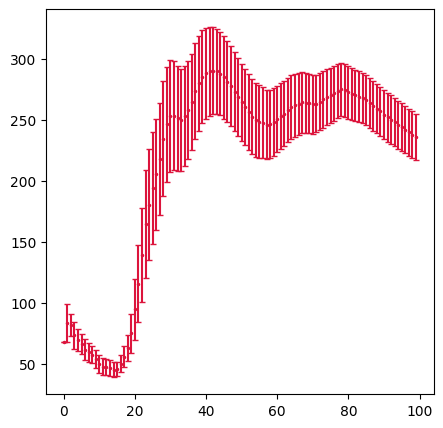

In [ ]:
#plot the final integral:
df = pd.read_csv("output_integral.dat", delim_whitespace=True, header=None, names=['H', 'error'])

fig, ax = plt.subplots(1,1,figsize=(5, 5))

ax.errorbar(x=range(len(df)), y=df['H'], yerr=df['error'], fmt='o', markersize=1.5, capsize=2, color='crimson')

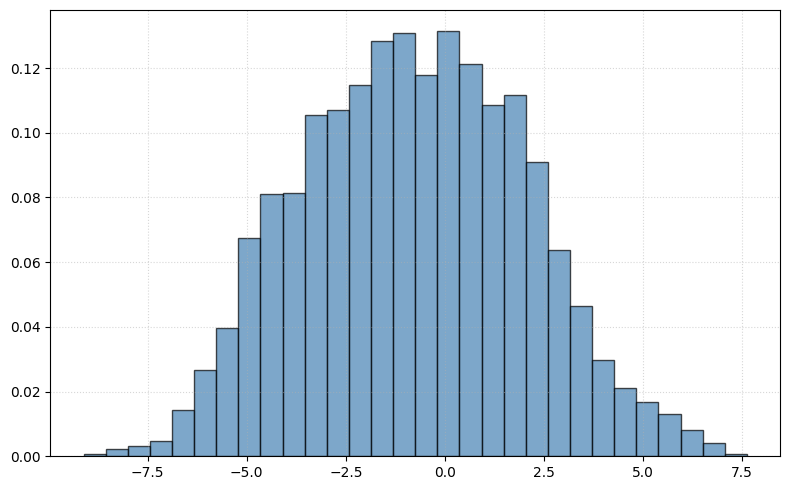

In [ ]:
df = pd.read_csv("samples.dat", delim_whitespace=True, header=None)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df[0], bins=30, color='steelblue', edgecolor='black', alpha=0.7, density=True)

plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331760998
2nd excited state energy:  1.971733134393021


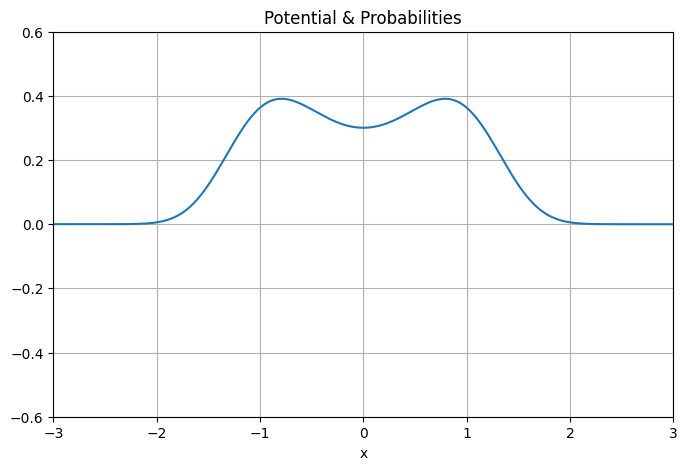

In [ ]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal,
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()